In [1]:
# 0. Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 2. Check if GPU is available (connect to a GPU runtime first)
!nvidia-smi

Sat May 10 11:09:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [34]:
# CUDAMatMult
%cd /content/drive/MyDrive/Colab\ Notebooks/CUDA/CUDA_LaplaceLocalShared/
# Create build folder
!mkdir build
%cd build
!rm -rf *
# Use cmake to generate makefile
!cmake ..
# Run
!make run

/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared
mkdir: cannot create directory ‘build’: File exists
/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/build
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- The CUDA compiler identification is NVIDIA 12.5.82 with host compiler GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc - skipped
-- Detecting CUDA compile features
-- Detecting CUDA compile featur

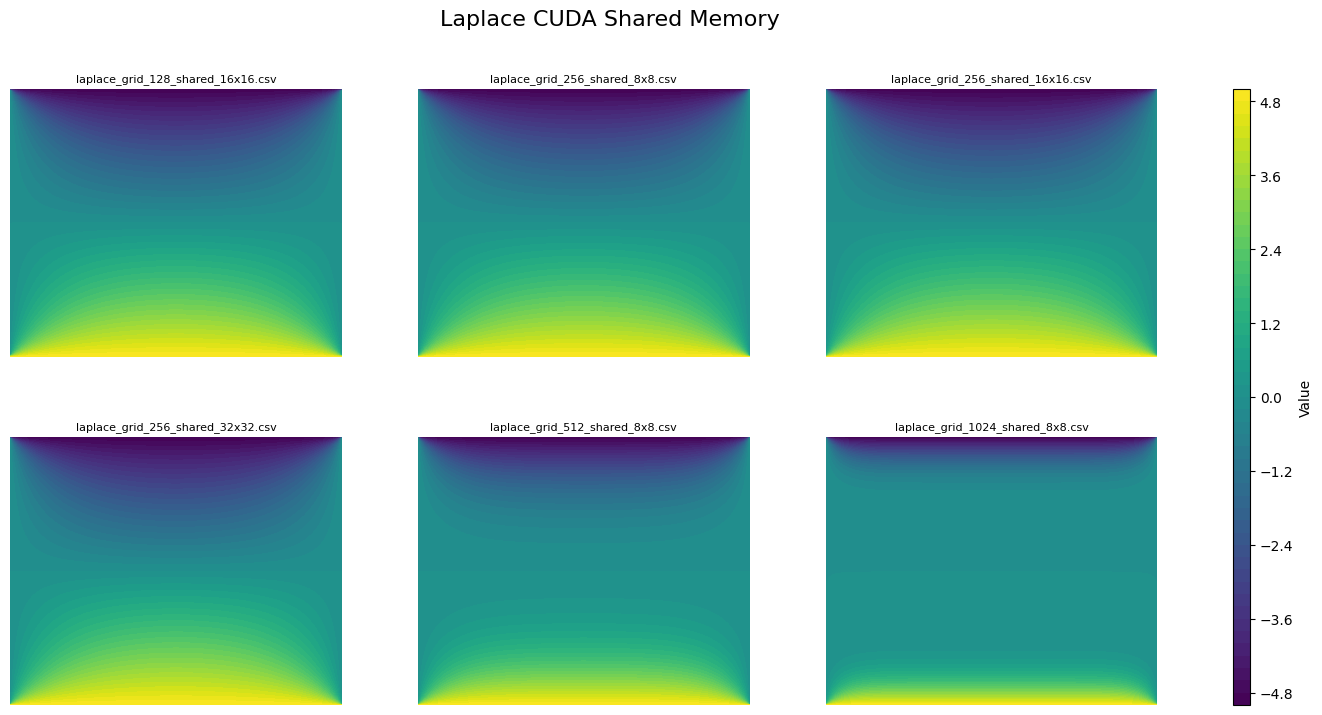

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

# Manually enter full paths to CSV files
files = [
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_128_shared_16x16.csv",
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_256_shared_8x8.csv",
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_256_shared_16x16.csv",
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_256_shared_32x32.csv",
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_512_shared_8x8.csv",
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_1024_shared_8x8.csv"
]

# Create a grid layout with space for the colorbar on the side
fig = plt.figure(figsize=(16, 8))
spec = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.3, hspace=0.3)

# Load all data first to determine consistent color scale
all_data = [np.loadtxt(f, delimiter=',') for f in files]
vmin = min(d.min() for d in all_data)
vmax = max(d.max() for d in all_data)

# Plot subplots
for i, data in enumerate(all_data):
    ax = fig.add_subplot(spec[i // 3, i % 3])
    c = ax.contourf(data, levels=50, cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(os.path.basename(files[i]), fontsize=8)
    ax.axis('off')

# Colorbar on the right side
cbar_ax = fig.add_subplot(spec[:, 3])  # Span both rows
fig.colorbar(c, cax=cbar_ax).set_label('Value')

# Add main title
fig.suptitle("Laplace CUDA Shared Memory", fontsize=16)

plt.show()


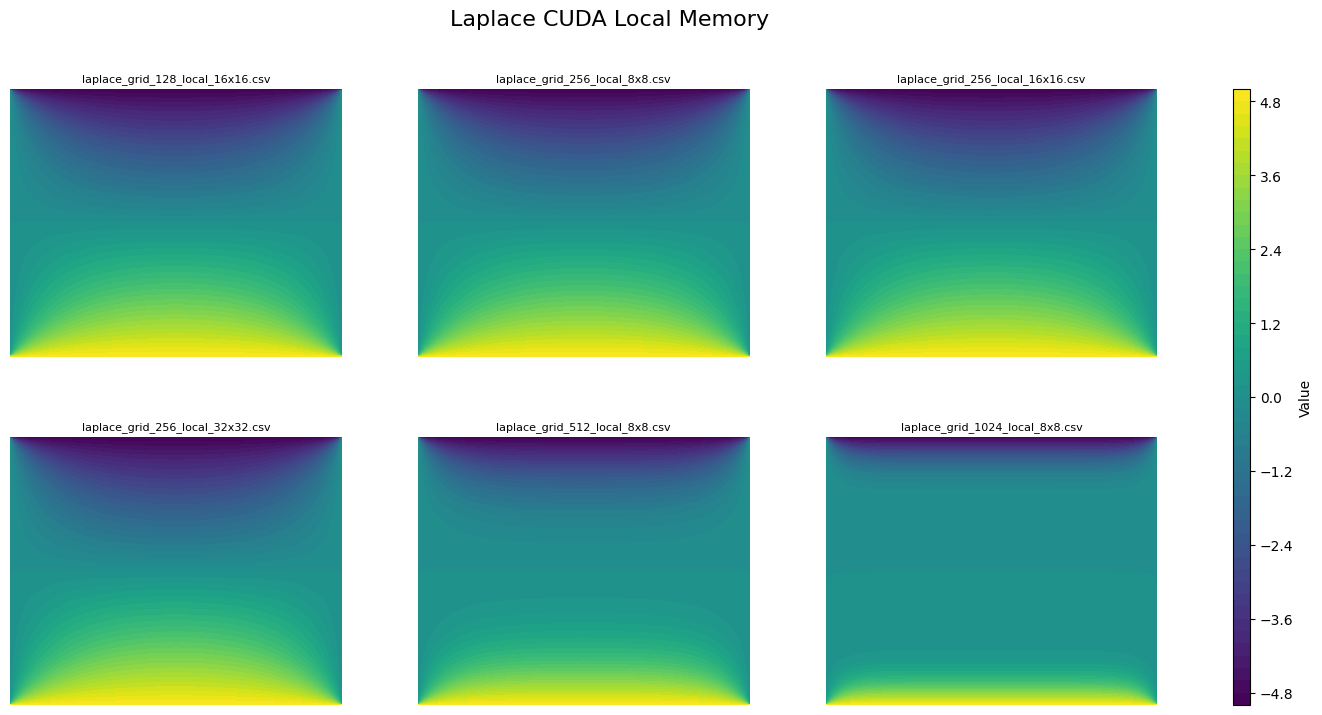

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

# Manually enter full paths to CSV files
files = [
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_128_local_16x16.csv",
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_256_local_8x8.csv",
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_256_local_16x16.csv",
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_256_local_32x32.csv",
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_512_local_8x8.csv",
    "/content/drive/MyDrive/Colab Notebooks/CUDA/CUDA_LaplaceLocalShared/laplace_grid_1024_local_8x8.csv"
]

# Create a grid layout with space for the colorbar on the side
fig = plt.figure(figsize=(16, 8))
spec = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.3, hspace=0.3)

# Load all data first to determine consistent color scale
all_data = [np.loadtxt(f, delimiter=',') for f in files]
vmin = min(d.min() for d in all_data)
vmax = max(d.max() for d in all_data)

# Plot subplots
for i, data in enumerate(all_data):
    ax = fig.add_subplot(spec[i // 3, i % 3])
    c = ax.contourf(data, levels=50, cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(os.path.basename(files[i]), fontsize=8)
    ax.axis('off')

# Colorbar on the right side
cbar_ax = fig.add_subplot(spec[:, 3])  # Span both rows
fig.colorbar(c, cax=cbar_ax).set_label('Value')

# Add main title
fig.suptitle("Laplace CUDA Local Memory", fontsize=16)

plt.show()
